In [11]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt # 1차월 배열간 코사인 유사도 계산 
from scipy.spatial.distance import cosine



In [12]:
kospi = fdr.DataReader('KS11')
kospi

/home/kar7mp5/.local/lib/python3.8/site-packages/FinanceDataReader/data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
/home/kar7mp5/.local/lib/python3.8/site-packages/FinanceDataReader/data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)


,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...
2022-02-25,2676.76,2678.47,2694.81,2665.96,664350000.0,0.0106
2022-02-28,2699.18,2663.00,2699.18,2658.25,613470000.0,0.0084
2022-03-02,2703.52,2698.31,2716.46,2692.24,527950000.0,0.0016


<AxesSubplot:xlabel='Date'>

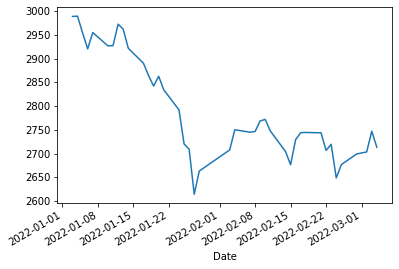

In [13]:
kospi_close = kospi['Close'] 
d_start = '2022-01-01' 
d_end = '2022-03-5'
kospi_close[d_start:d_end].plot()

In [14]:
count = 0
compare_base_r = kospi_close[d_start:d_end]

compare_base = compare_base_r.values
# 정규화
compare_base_norm = (compare_base - compare_base.mean()) / compare_base.std()
compare_base_norm = list(compare_base_norm)

window_size = len(compare_base_norm)
next_date = 5

moving_cnt = len(kospi_close) - (window_size-1) - next_date
sim_dict = {}

for i in range(moving_cnt):
    compare_target_r = kospi_close[i:i+window_size]

    compare_target = compare_target_r.values

    compare_target_norm = (compare_target - compare_target.mean()) / compare_target.std()

    compare_target_norm = list(compare_target_norm)

    sim = cosine(compare_base_norm, compare_target_norm)
    
    sim_dict[sim] = [i, compare_target_r]

In [15]:
# 최소 코사인 유사도
min_sim = min(list(sim_dict.keys())) 
# 최소 코사인 유사도가 나온 인덱스, 기간 추출 
sim_dict[min_sim]


[4847,
 Date
 1997-11-11    522.11
 1997-11-12    517.49
 1997-11-13    519.47
 1997-11-14    520.01
 1997-11-15    519.37
 1997-11-17    496.98
 1997-11-18    494.66
 1997-11-19    502.59
 1997-11-20    488.41
 1997-11-21    506.07
 1997-11-22    485.43
 1997-11-24    450.64
 1997-11-25    439.59
 1997-11-26    438.70
 1997-11-27    433.10
 1997-11-28    411.91
 1997-11-29    407.86
 1997-12-01    393.16
 1997-12-02    376.87
 1997-12-03    379.31
 1997-12-04    405.81
 1997-12-05    434.12
 1997-12-06    435.73
 1997-12-08    414.83
 1997-12-09    388.00
 1997-12-10    399.85
 1997-12-11    377.37
 1997-12-12    350.68
 1997-12-13    359.82
 1997-12-15    385.80
 1997-12-16    404.26
 1997-12-17    418.49
 1997-12-19    397.02
 1997-12-20    400.19
 1997-12-22    396.06
 1997-12-23    366.36
 1997-12-24    351.45
 1997-12-26    375.15
 1997-12-27    376.31
 1998-01-03    385.49
 1998-01-05    396.49
 Name: Close, dtype: float64]

In [16]:
compare_base_norm

[1.8403261103927213,
 1.8447412085842885,
 1.5134209676978096,
 1.1992914282806355,
 1.5220632875621585,
 1.2574392108461918,
 1.2636391359662706,
 1.6873006858381214,
 1.5896988343266252,
 1.2123488463365517,
 0.9134373049413768,
 0.6705129661456752,
 0.46422454851406353,
 0.6558585976800418,
 0.38916787925738516,
 -0.008097019724446174,
 -0.6807888952526802,
 -0.7855300544782053,
 -1.6755950622466742,
 -1.2167066651016607,
 -0.7988692873123044,
 -0.40019531443954587,
 -0.44904320932499475,
 -0.43579791475028856,
 -0.22556409022407822,
 -0.19663110633039146,
 -0.4241495705852953,
 -0.8302446659502655,
 -1.092708162700145,
 -0.5935202522746428,
 -0.4581552204863165,
 -0.4541158753323292,
 -0.4608794300087738,
 -0.8085449280300004,
 -0.6888675855606547,
 -1.3532928942621198,
 -1.0906415209934506,
 -0.8800319434296644,
 -0.8392627388521944,
 -0.43006768092718695,
 -0.7461699237916625]

In [17]:
# 검색 구간 데이터 -> 값만 추출 
compare_target = compare_target_r.values
# 검색 구간 데이터 표준화
compare_target_norm = (compare_target - compare_target.mean())/compare_target.std()
compare_target_norm = list(compare_target_norm)
# 표준화된 검색 구간 데이터
compare_target_norm


[1.5319367898769305,
 1.4246315173645365,
 1.5970031080696179,
 1.3724784889540065,
 1.2421792294746685,
 1.3348216697182897,
 1.3387373124264268,
 1.0448974862220606,
 0.7663036731153443,
 1.0525621485443752,
 0.8178735206969975,
 0.8233720827977906,
 1.1991071596851421,
 1.1125464623711834,
 0.777883978145796,
 0.5127866356501062,
 0.2973429751554947,
 0.11439081798374086,
 0.2843463738263539,
 0.04782489194538092,
 -0.3044996402401205,
 -0.9010936281758931,
 -0.9939860030604609,
 -1.7833629107118274,
 -1.3763860037063442,
 -1.0058162427318555,
 -0.6522420373416283,
 -0.6955640417721013,
 -0.6838171136476864,
 -0.49736587150269784,
 -0.4717059150323427,
 -0.6734864818219568,
 -1.033642299423736,
 -1.2664147616905352,
 -0.8236972010299177,
 -0.7036452618293221,
 -0.7000628653091114,
 -0.7060612966917903,
 -1.0143973320709696,
 -0.9082584212163144,
 -1.4975209930176987]

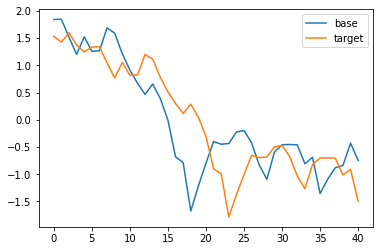

In [18]:
plt.plot(compare_base_norm, label='base')
plt.plot(compare_target_norm, label='target')
plt.legend()
plt.show()


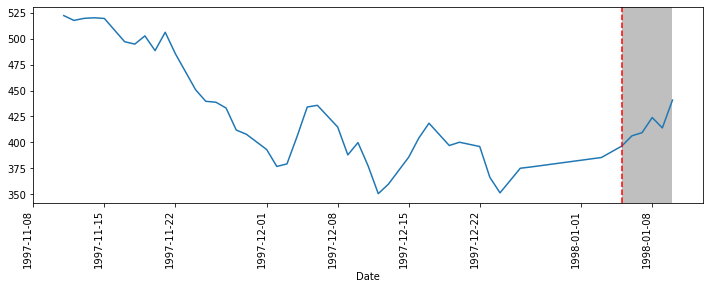

In [19]:
# 반복문 인덱스 복원
idx = sim_dict[min_sim][0]
# 반복문 타겟 구간 시계열 데이터 복원
compare_target_r = sim_dict[min_sim][1]
plt.figure(figsize=(12,4))
expanded_target_r = kospi_close[idx:idx+window_size+next_date]
expanded_target_r.plot()
plt.axvspan(compare_target_r.index[-1], expanded_target_r.index[-1], facecolor='gray', alpha=0.5)
plt.axvline(x=compare_target_r.index[-1], c='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()
